In [261]:
import pandas as pd
import numpy as np
import csv
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import string
from textblob import TextBlob
import squarify
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, colors


In [55]:
#csv reading
NYC = pd.read_csv('NYC_2019.csv')


In [56]:
NYC = pd.DataFrame(NYC)


In [50]:
NYC.head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [68]:
#cleaning

#print the number of rows

num_rows = NYC.shape[0]

# Print the number of rows
print(f"Total number of rows: {num_rows}")
# column types and transformation

print(NYC.dtypes)

NYC['name'] = NYC['name'].astype(str)



Total number of rows: 48895
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [34]:
#Print sum of NA
for column in NYC.columns:
    # Get the NaN count for the current column
    nan_count = NYC[column].isna().sum()

    # Print the NaN count for the current column
    print(f"NaN count in '{column}': {nan_count}")

NaN count in 'id': 0
NaN count in 'name': 16
NaN count in 'host_id': 0
NaN count in 'host_name': 21
NaN count in 'neighbourhood_group': 0
NaN count in 'neighbourhood': 0
NaN count in 'latitude': 0
NaN count in 'longitude': 0
NaN count in 'room_type': 0
NaN count in 'price': 0
NaN count in 'minimum_nights': 0
NaN count in 'number_of_reviews': 0
NaN count in 'last_review': 10052
NaN count in 'reviews_per_month': 10052
NaN count in 'calculated_host_listings_count': 0
NaN count in 'availability_365': 0


In [119]:
nan_name_rows = NYC[NYC['name'].isna()]
nan_name = pd.DataFrame(nan_name_rows)

NYC = NYC.dropna(subset=['name'])


In [120]:
reviews = NYC.sort_values(by='number_of_reviews', ascending=False)
reviews= pd.DataFrame(reviews)
reviews.head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [155]:

import re

name_tokens = []
for name in NYC['name']:
    # Tokenize the text
    tokens = nltk.word_tokenize(name)
    name_tokens.append(tokens)

stop_words = set(stopwords.words('english'))
cleaned_tokens = []

# Loop through each token in the name_tokens list
for tokens in name_tokens:
    for token in tokens:
        # Replace consecutive punctuation with a single space
        token = re.sub(r'[{0}]+'.format(string.punctuation), ' ', token)
        # Remove leading/trailing whitespace and convert to lowercase
        token = token.strip().lower()
        # Add the cleaned token to the list
        if token and token not in stop_words:
            cleaned_tokens.append(token)

# Get the 50 most common tokens
token_counts = Counter(cleaned_tokens)
top_tokens = pd.DataFrame(token_counts.most_common(50), columns=['Token', 'Count'])






In [224]:
name_tokens = []
for name in NYC['name']:
    # Tokenize the text
    tokens = nltk.word_tokenize(name)
    name_tokens.append(tokens)

stop_words = set(stopwords.words('english'))
cleaned_tokens = []

# Loop through each token in the name_tokens list
for tokens in name_tokens:
    tagged_tokens = nltk.pos_tag(tokens)
    for token, pos in tagged_tokens:
        # If the part of speech is an adjective, add the cleaned token to the list
        if pos.startswith('JJ') and token not in stop_words:
            # Replace consecutive punctuation with a single space
            cleaned_token = re.sub(r'[{0}]+'.format(string.punctuation), ' ', token)
            # Remove leading/trailing whitespace and convert to lowercase
            cleaned_token = cleaned_token.strip().lower()
            if cleaned_token:
                cleaned_tokens.append(cleaned_token)

# Get the 20 most common tokens
token_counts = Counter(cleaned_tokens)
top_tokens = pd.DataFrame(token_counts.most_common(101), columns=['Token', 'Count'])




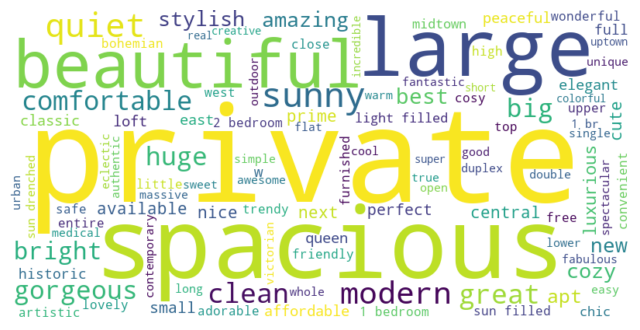

In [225]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# list of (token, count) tuples from the top_tokens dataframe
word_freq = list(zip(top_tokens['Token'], top_tokens['Count']))

# WordCloud object 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))

# Display the word cloud 
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [300]:
# Define empty lists for each category
quiet_list = []
private_list = []
luxurious_list = []
beauty_and_aesthetics_list = []
large_spaces_list = []
good_location_list = []
bright_apartments_list = []

In [301]:
# Loop through each row of the dataframe and append the name to the corresponding category list
for index, row in NYC.iterrows():
    name = row['name']
    if re.search('quiet|calm|peaceful', name, re.IGNORECASE):
        quiet_list.append(name)
    elif re.search('private', name, re.IGNORECASE):
        private_list.append(name)
    elif re.search('luxurious|expensive', name, re.IGNORECASE):
        luxurious_list.append(name)
    elif re.search('beautiful|gorgeous|pretty|cute|fantastic|stylish', name, re.IGNORECASE):
        beauty_and_aesthetics_list.append(name)
    elif re.search('spacious|large|big', name, re.IGNORECASE):
        large_spaces_list.append(name)
    elif re.search('steps away|near|good location|central|midtown', name, re.IGNORECASE):
        good_location_list.append(name)
    elif re.search('bright|sunny', name, re.IGNORECASE):
        bright_apartments_list.append(name)

In [302]:
# Calculate the average reviews per month for each category
quiet_reviews = NYC[NYC['name'].isin(quiet_list)]['number_of_reviews'].sum()
private_reviews = NYC[NYC['name'].isin(private_list)]['number_of_reviews'].sum()
luxurious_reviews = NYC[NYC['name'].isin(luxurious_list)]['number_of_reviews'].sum()
beauty_and_aesthetics_reviews = NYC[NYC['name'].isin(beauty_and_aesthetics_list)]['number_of_reviews'].sum()
large_spaces_reviews = NYC[NYC['name'].isin(large_spaces_list)]['number_of_reviews'].sum()
good_location_reviews = NYC[NYC['name'].isin(good_location_list)]['number_of_reviews'].sum()
bright_apartments_reviews = NYC[NYC['name'].isin(bright_apartments_list)]['number_of_reviews'].sum()

In [303]:
category_reviews = pd.DataFrame({'Category': ['Quiet', 'Private', 'Luxurious', 'Beauty and Aesthetics', 'Large Spaces', 'Good Location', 'Bright Apartments'], 
                                 'Sum of Reviews': [quiet_reviews, private_reviews, luxurious_reviews, beauty_and_aesthetics_reviews, large_spaces_reviews, good_location_reviews, bright_apartments_reviews]})
category_reviews

,Category,Sum of Reviews
0,Quiet,39893
1,Private,208180
2,Luxurious,3972
3,Beauty and Aesthetics,73866
4,Large Spaces,94059
5,Good Location,82864
6,Bright Apartments,48343


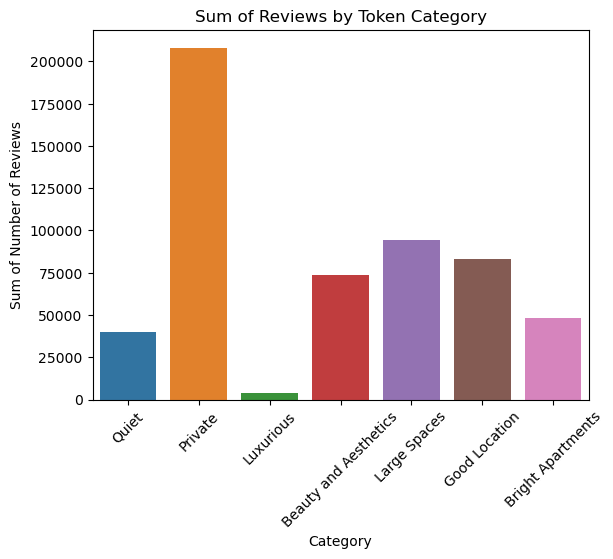

In [304]:
# create a bar plot of token category and sum of reviews
sns.barplot(x="Category", y="Sum of Reviews", data=category_reviews)
plt.title("Sum of Reviews by Token Category")
plt.xlabel("Category")
plt.ylabel("Sum of Number of Reviews")
plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees
plt.show()

In [164]:
# observe prices



price_stats = NYC['price'].describe()

# Print the table of descriptive statistics
print(price_stats)


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


In [251]:
# Group the data by neighborhood group and calculate the average price
grouped = NYC.groupby("neighbourhood_group")["price"].mean().reset_index()

# create the plot
fig, ax = plt.subplots(figsize=(8, 6))
squarify.plot(sizes=grouped["price"], label=grouped["neighbourhood_group"]

# add labels and title
plt.title("Tree Map of Category Values")
plt.axis("off")
plt.show()




,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


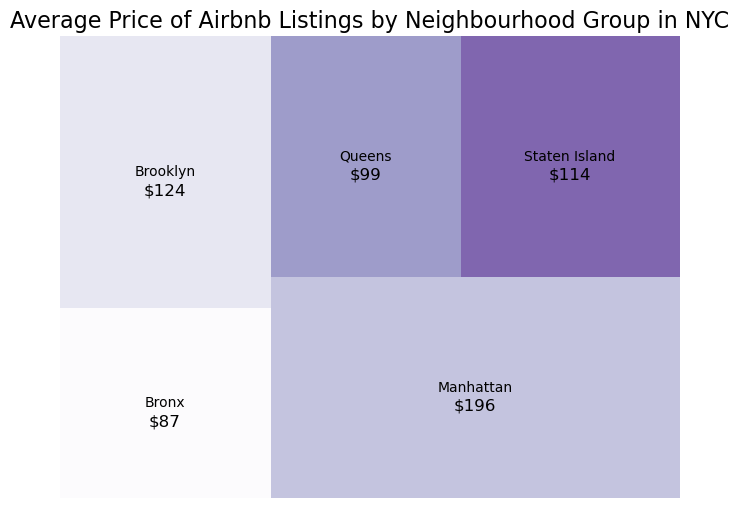

In [298]:
# Generate a list of colors
colors = [plt.cm.Purples(i/len(grouped)) for i in range(len(grouped))]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
squarify.plot(sizes=grouped["price"], label=grouped["neighbourhood_group"], alpha=.8, color=colors)
plt.axis('off')

# Add labels to the rectangles
for i, (size, label) in enumerate(zip(grouped["price"], grouped["neighbourhood_group"])):
    rect = ax.patches[i]
    x, y = rect.get_xy()
    w, h = rect.get_width(), rect.get_height()
    ax.text(x + w/2, y + h/2 - 4, f"${int(size)}", fontsize=12, ha="center", va="center", color="Black")

# Add a title
ax.set_title("Average Price of Airbnb Listings by Neighbourhood Group in NYC", fontsize=16)

# Show the plot
plt.show()


